In [1]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

# Модель
Создадим класс линейной регрессии. Один слой в конструкторе, параметры: входные и выходные данные. Опишем конструктор и функцую прямого прохода.

In [2]:
class Linear(nn.Module):
    def __init__(self, in_layer, out_layer):
        super(Linear, self).__init__()
        self.linear = nn.Linear(in_layer, out_layer)

    def forward(self, x):
        out = self.linear(x)
        return out

Создадим экземпляр модели. На вход подаются размерности входа и выхода.
Инициализируем гиперпараметры: learning rate, optimizer, loss function.

In [3]:
model = Linear(1, 1)

lr = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.MSELoss()

Сгенерируем данные: x-координату, y-координату - результат функции и y_noised - результат функции с добавлением шума из нормального распределения с параметрами (0, 1). Отрисуем картинку: зелёные точки - зашумленные данные, синяя прямая - идеальные данные без шума, которые модели предстоит предсказать. 

In [4]:
x = torch.linspace(0, 20, 70).view(-1, 1)
y = 11 * x + 3
y_noised = 11 * x + 3 + torch.randn(x.size())

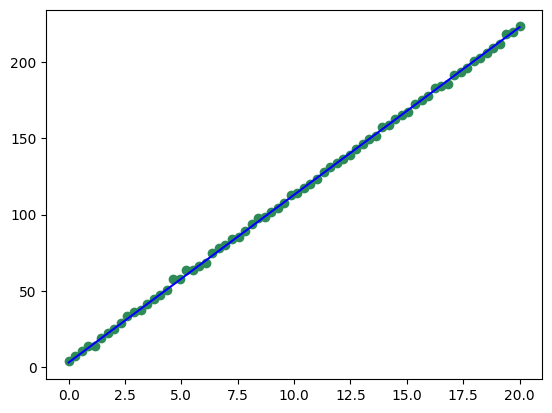

In [5]:
plt.plot(x, y, color='blue')
plt.scatter(x, y_noised, color='seagreen')

Запускаем обучение. Выберем 1500 итераций.

In [6]:
losses = []

epochs = 1500
for epoch in tqdm(range(1, epochs)):

    optimizer.zero_grad()
    pred = model(x)
    loss = criterion(pred, y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

print(model.state_dict())

100%|██████████| 1499/1499 [00:00<00:00, 2176.18it/s]

OrderedDict([('linear.weight', tensor([[8.9684]])), ('linear.bias', tensor([9.7348]))])


График изменения loss с течением обучения.

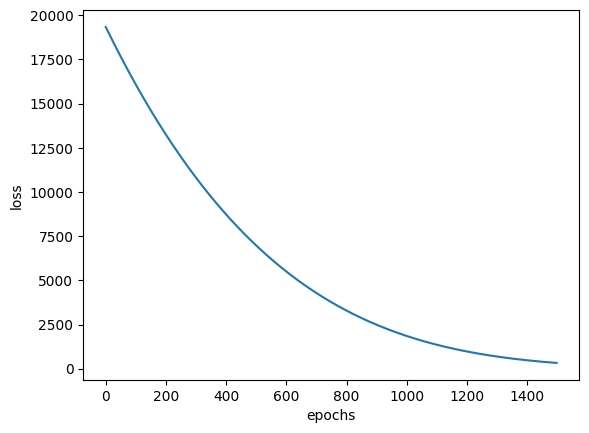

In [7]:
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss');

График с данными, полученными от модели (оранжевая прямая).

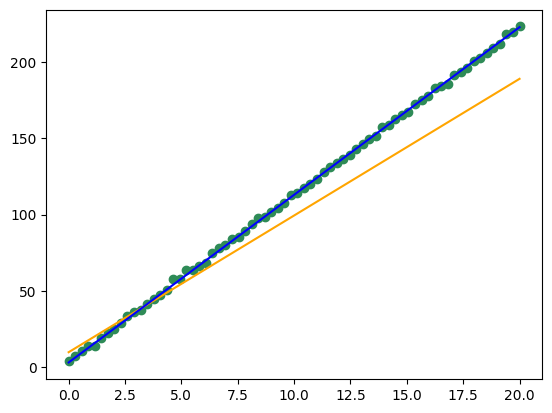

In [8]:
y_pred = model.state_dict()['linear.weight'].item() * x + model.state_dict()['linear.bias'].item()
plt.plot(x, y_pred, color='orange')
plt.plot(x, y, color='blue')
plt.scatter(x, y_noised, color='seagreen')

Если повысить количеств итераций, модель предскажет исходную практически идеально.

100%|██████████| 4999/4999 [00:02<00:00, 2484.74it/s]

OrderedDict([('linear.weight', tensor([[10.7938]])), ('linear.bias', tensor([5.7044]))])


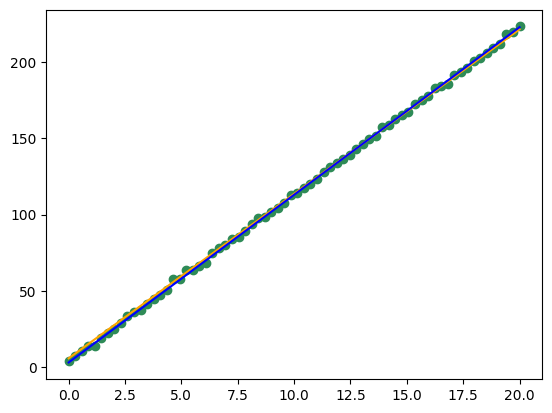

In [9]:
epochs = 5000
for epoch in tqdm(range(1, epochs)):

    optimizer.zero_grad()
    pred = model(x)
    loss = criterion(pred, y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    
print(model.state_dict())

y_pred = model.state_dict()['linear.weight'].item() * x + model.state_dict()['linear.bias'].item()
plt.plot(x, y_pred, color='orange')
plt.plot(x, y, color='blue')
plt.scatter(x, y_noised, color='seagreen')